# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Oprah Winfrey
- Miley Cyrus
- Sam Smith
- J. Cole

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [89]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('precision', 2)

# Data Cleaning

Describe your data cleaning steps here.

In [90]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Data Analysis & Results

### Analysis 1

In [91]:
# to run this you will need to go to your terminal and type in: pip install import-ipynb
import import_ipynb
import city_and_county_datasets as citydata
import top500_undergradpop_demographic as undergrad_demo

df_undergrads = undergrad_demo.df_niche_800
df_cities = citydata.df_cities
df_counties = citydata.df_counties
df_counties

,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
middlesex-ma,0.06,0.12,0.08,0.02,0.00,0.00,0.08,0.72
newhaven-ct,0.15,0.04,0.18,0.02,0.01,0.00,0.15,0.63
santaclara-ca,0.03,0.38,0.26,0.04,0.01,0.01,0.21,0.32
delaware-oh,0.04,0.07,0.03,0.02,0.00,0.00,0.02,0.85
morgan-il,0.06,0.01,0.02,0.02,0.00,0.00,0.02,0.89
walworth-wi,0.01,0.01,0.11,0.01,0.01,0.00,0.11,0.85
sanbernardino-ca,0.09,0.08,0.53,0.04,0.02,0.01,0.47,0.29
shasta-ca,0.01,0.03,0.10,0.04,0.03,0.00,0.09,0.80
westmoreland-pa,0.03,0.01,0.01,0.01,0.00,0.00,0.01,0.94
alameda-ca,0.11,0.31,0.23,0.05,0.01,0.01,0.19,0.32


In [92]:
df_undergrads

,ranking,name,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
0,1,massachusetts-institute-of-technology,0.07,0.28,0.17,0.07,0,0,0.02,0.39
1,2,stanford-university,0.07,0.23,0.16,0.12,0.01,0,0.01,0.4
2,3,harvard-university,0.07,0.22,0.12,0.06,0,0,0.04,0.49
3,4,yale-university,0.07,0.19,0.14,0.06,0.01,0,0.04,0.49
4,5,princeton-university,0.08,0.23,0.1,0.05,0,0,0.07,0.47
5,6,university-of-pennsylvania,0.08,0.23,0.1,0.05,0,0,0.05,0.49
6,7,columbia-university,0.09,0.21,0.16,0.06,0,0,0.04,0.45
7,8,duke-university,0.11,0.23,0.09,0.02,0.01,0,0.03,0.51
8,9,brown-university,0.07,0.16,0.13,0.07,0,0,0.09,0.48
9,10,california-institute-of-technology,0.01,0.47,0.13,0.08,0,0,0,0.31


In [93]:
df_topmidbot = df_undergrads[:4]
df_topmidbot = df_topmidbot.append(df_undergrads[438:441])
df_topmidbot = df_topmidbot.append(df_undergrads[877:881])
df_topmidbot.index = df_topmidbot["ranking"]
df_topmidbot2 = df_topmidbot.drop(columns=["name", "ranking"])
df_topmidbot2

,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
ranking,,,,,,,,
1,0.07,0.28,0.17,0.07,0,0,0.02,0.39
2,0.07,0.23,0.16,0.12,0.01,0,0.01,0.4
3,0.07,0.22,0.12,0.06,0,0,0.04,0.49
4,0.07,0.19,0.14,0.06,0.01,0,0.04,0.49
439,0.06,0.01,0.02,0.02,0,0,0.03,0.85
440,0.19,0.01,0.07,0.02,0,0,0.03,0.67
441,0.09,0.06,0.1,0.05,0,0,0.13,0.57
878,0.05,0.01,0.03,0.02,0,0,0.06,0.83
879,0.06,0.06,0.66,0.03,0,0,0.04,0.14


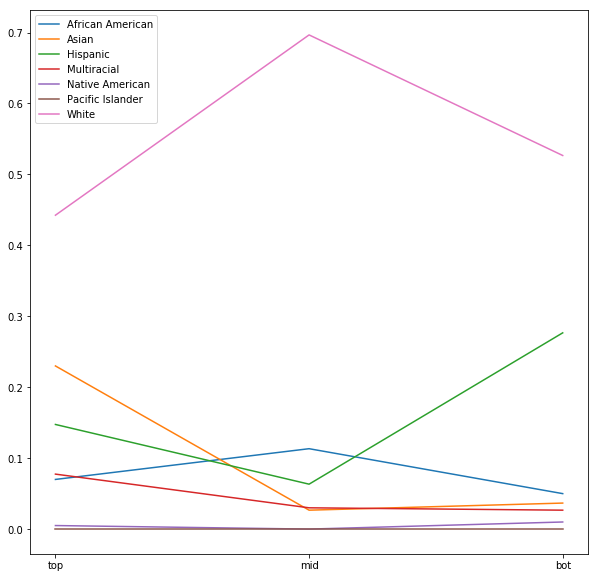

In [94]:
means = []
'''
means.append(df_topmidbot2[:4].mean())
means.append(df_topmidbot2[4:7].mean())
means.append(df_topmidbot2[7:11].mean()) '''
df = pd.DataFrame()
df_topmidbot2 = df_topmidbot2.drop(columns="Unknown", axis=1)
df["top"] = df_topmidbot2[:4].mean()
df["mid"] = df_topmidbot2[4:7].mean()
df["bot"] = df_topmidbot2[7:11].mean()
df = df.transpose()

plt.rcParams["figure.figsize"] = [10,10]
plt.plot(df)
plt.gca().legend(df.columns)
plt.show()

In [95]:
def bar_plot_county_city(county_name, college_name, top_mid_bot, county_color, college_color):
    ind = np.arange(8) 
    width = 0.42

    plt.bar(ind, df_counties.loc[county_name].values, width, label = county_name, color = county_color)
    df_temp = (df_undergrads.loc[df_undergrads['name'] == college_name]).drop(columns = ['ranking', 'name'])
    plt.bar(ind + width, df_temp.values[0], width, label = college_name, color = college_color)

    plt.xticks(ind + width / 2, df_counties.columns)
    plt.ylabel('Percentage of Total Population')
    plt.title('Ethnicity Percentages for ' + top_mid_bot + ' 3 Ranked County & University')
    plt.legend(loc='best')
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

In the following bar graphs, the absence of a bar denotes less than 0 percent of the population.

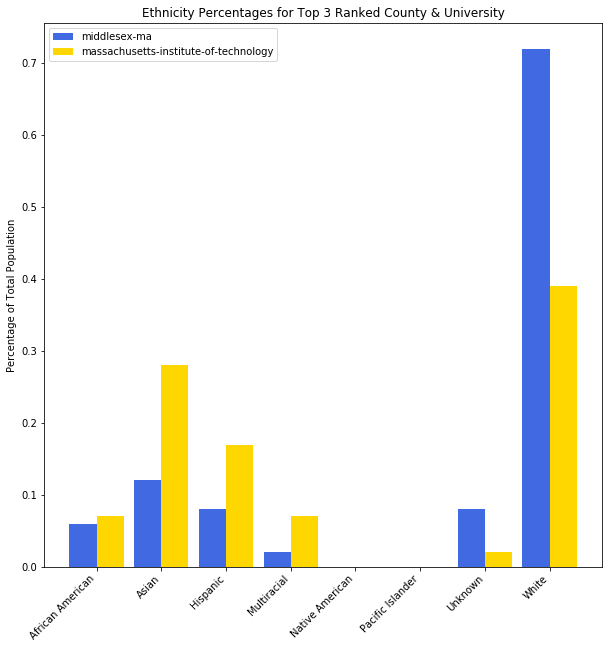

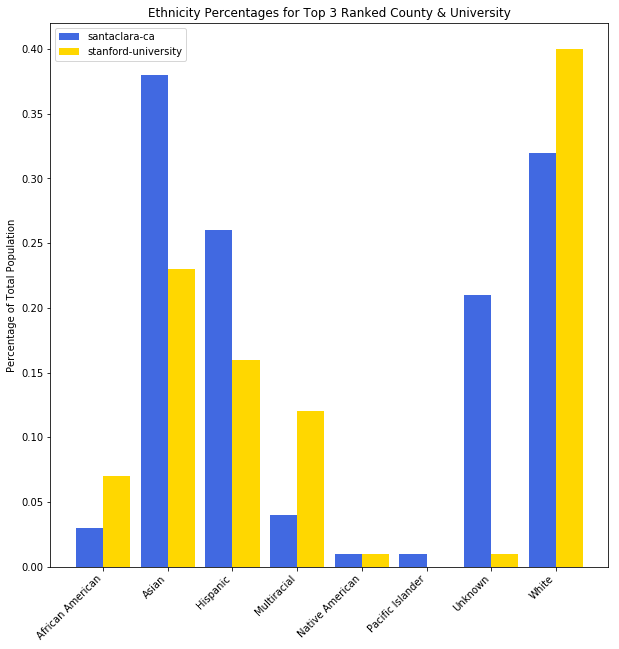

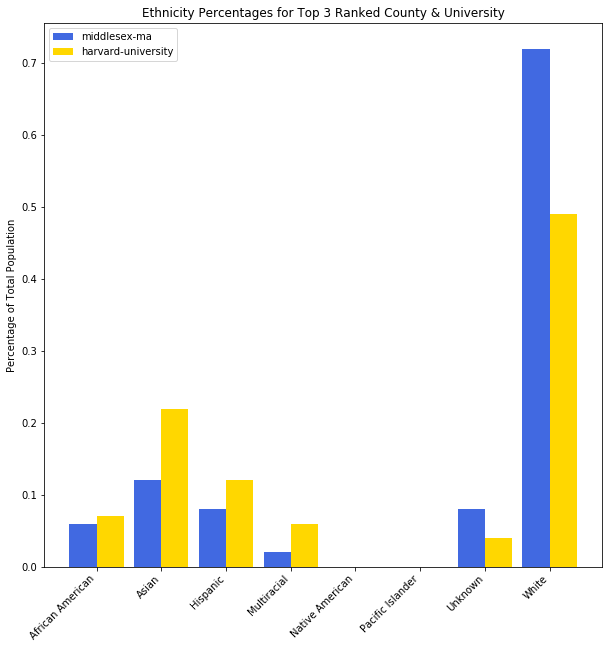

In [96]:
bar_plot_county_city('middlesex-ma', 'massachusetts-institute-of-technology', 'Top', 'royalblue', 'gold')
bar_plot_county_city('santaclara-ca', 'stanford-university', 'Top', 'royalblue', 'gold')
bar_plot_county_city('middlesex-ma', 'harvard-university', 'Top', 'royalblue', 'gold')

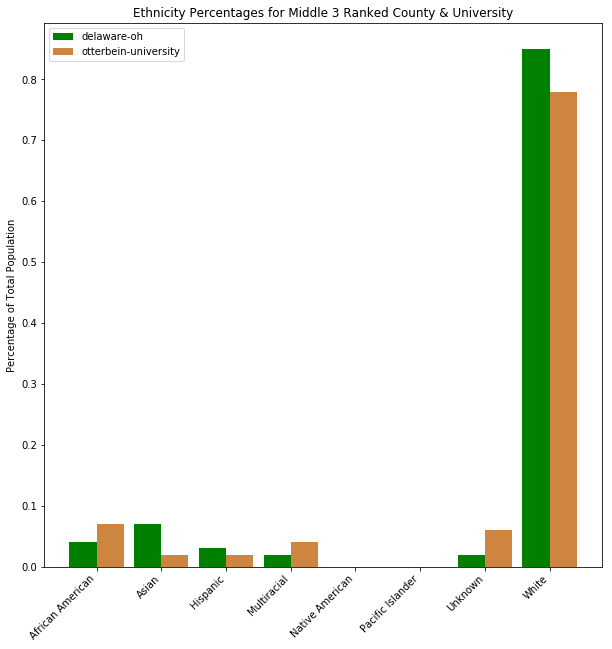

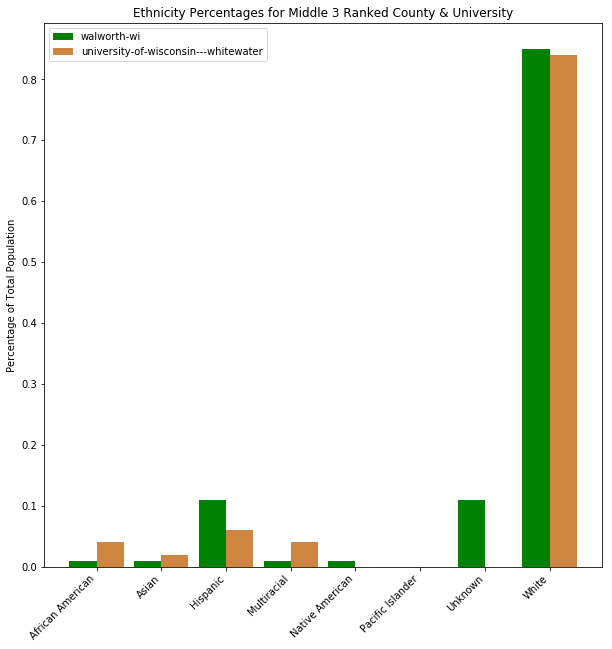

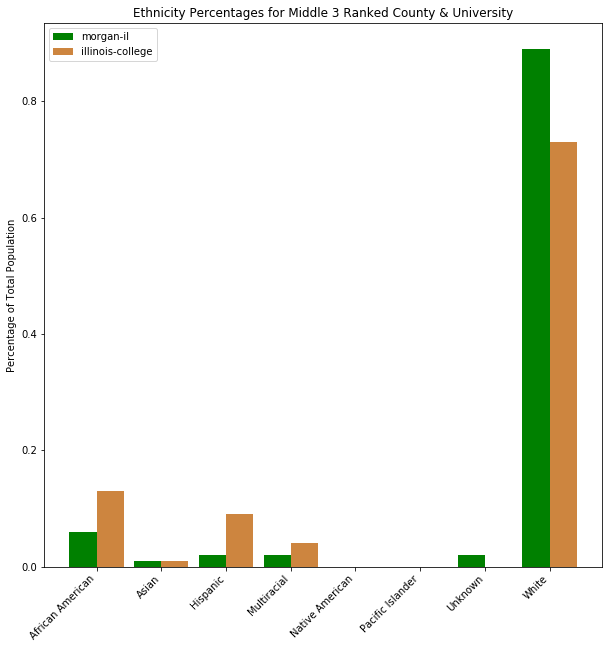

In [97]:
bar_plot_county_city('delaware-oh', 'otterbein-university', 'Middle', 'green', 'peru')
bar_plot_county_city('walworth-wi', 'university-of-wisconsin---whitewater', 'Middle', 'green', 'peru')
bar_plot_county_city('morgan-il', 'illinois-college', 'Middle', 'green', 'peru')

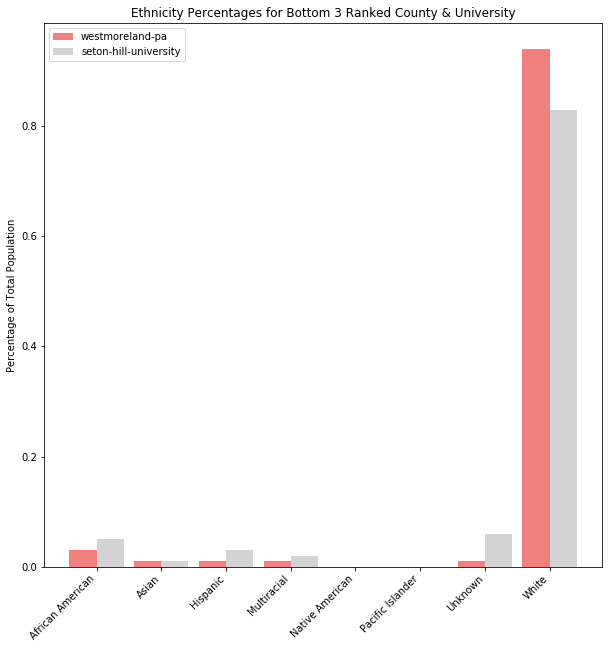

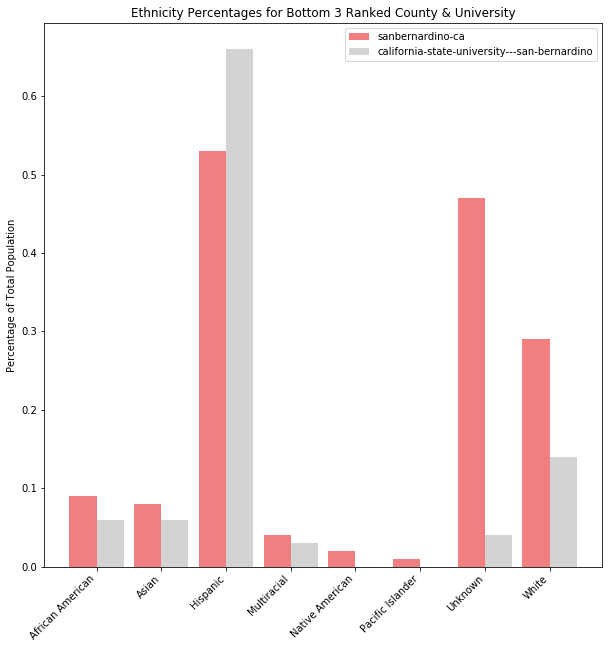

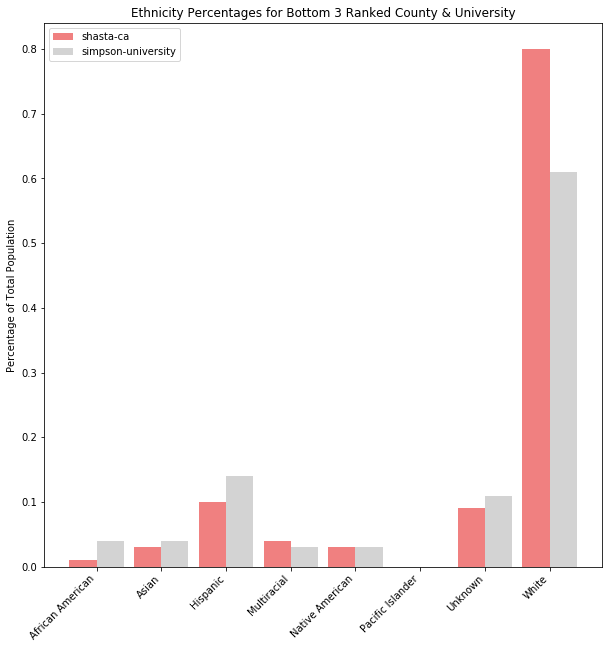

In [98]:
bar_plot_county_city('westmoreland-pa', 'seton-hill-university', 'Bottom', 'lightcoral', 'lightgray')
bar_plot_county_city('sanbernardino-ca', 'california-state-university---san-bernardino', 'Bottom', 'lightcoral', 'lightgray')
bar_plot_county_city('shasta-ca', 'simpson-university', 'Bottom', 'lightcoral', 'lightgray')

We will then test for correlation. 

## Question: Is there a relationship between the ranking tier (top, middle, bottom) and the similarity between the college and surrounding county demographics?

### We hypothesize that lower ranked schools will have higher demographic similarity with the surrounding county.
By doing a chi-square test, we would expect the difference between demographic data and college demographic data to be the same across all rankings.


In [99]:
def diff_county_college(county_name, college_name, dataframe,top_mid_bot):
    ranking = df_undergrads.loc[df_undergrads['name'] == college_name].ranking
    df_temp = (df_undergrads.loc[df_undergrads['name'] == college_name]).drop(columns = ['ranking', 'name'])
    dataframe = dataframe.append(df_counties.loc[county_name].values - df_temp)
    return dataframe

    
topdiff = pd.DataFrame()
topdiff = diff_county_college('middlesex-ma', 'massachusetts-institute-of-technology',topdiff,"Top")
topdiff = diff_county_college('santaclara-ca', 'stanford-university',topdiff,"Top")
topdiff = diff_county_college('middlesex-ma', 'harvard-university',topdiff,"Top")
topdiff = diff_county_college('delaware-oh', 'otterbein-university',topdiff,"Middle")
topdiff = diff_county_college('walworth-wi', 'university-of-wisconsin---whitewater',topdiff,"Middle")
topdiff = diff_county_college('morgan-il', 'illinois-college',topdiff,"Middle")
topdiff = diff_county_college('westmoreland-pa', 'seton-hill-university',topdiff,"Bottom")
topdiff = diff_county_college('sanbernardino-ca', 'california-state-university---san-bernardino',topdiff,"Bottom")
topdiff = diff_county_college('shasta-ca', 'simpson-university',topdiff,"Bottom")
topdiff = topdiff.drop(columns=["Native American", "Pacific Islander", "Unknown"])
topdiff["ranking"] = topdiff.index + 1


In [100]:
topdiff.ranking = pd.to_numeric(topdiff["ranking"])
topdiff.White = pd.to_numeric(topdiff["White"])
topdiff.Hispanic = pd.to_numeric(topdiff["Hispanic"])
topdiff.Multiracial = pd.to_numeric(topdiff["Multiracial"])
topdiff.Asian = pd.to_numeric(topdiff["Asian"])
topdiff["African American"] = pd.to_numeric(topdiff["African American"])
topdiff

,African American,Asian,Hispanic,Multiracial,White,ranking
0,-0.01,-0.16,-9.00e-02,-0.05,0.33,1
1,-0.04,0.15,1.00e-01,-0.08,-0.08,2
2,-0.01,-0.10,-4.00e-02,-0.04,0.23,3
428,-0.03,0.05,1.00e-02,-0.02,0.07,429
429,-0.03,-0.01,5.00e-02,-0.03,0.01,430
430,-0.07,0.00,-7.00e-02,-0.02,0.16,431
877,-0.02,0.00,-2.00e-02,-0.01,0.11,878
878,0.03,0.02,-1.30e-01,0.01,0.15,879
879,-0.03,-0.01,-4.00e-02,0.01,0.19,880


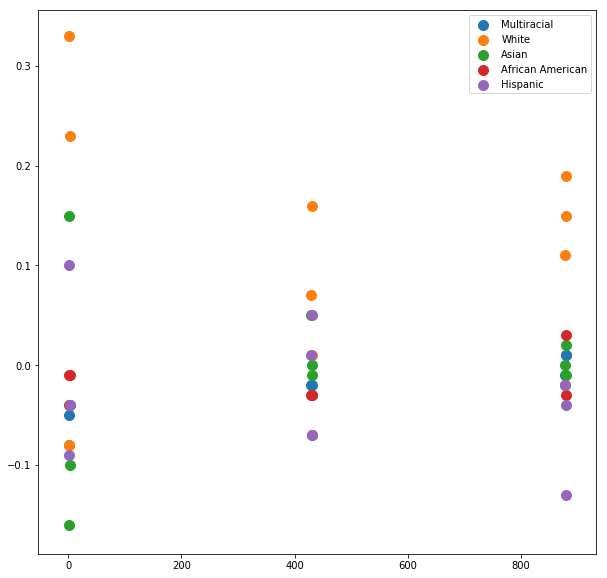

In [101]:
'''plt.scatter(x=topdiff["ranking"], y=topdiff["Multiracial"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["White"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Asian"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["African American"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Hispanic"],s = 100)
plt.legend()'''

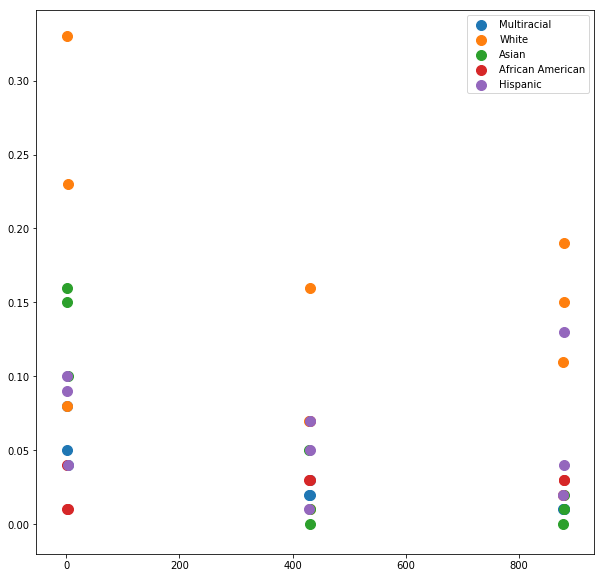

In [102]:
topdiff = topdiff.abs()
'''plt.scatter(x=topdiff["ranking"], y=topdiff["Multiracial"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["White"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Asian"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["African American"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Hispanic"], s = 100)
plt.legend()
'''

In [103]:
topdiffdesc = topdiff.drop("ranking", axis=1)

topdiffdesc = topdiffdesc.transpose()
print(topdiffdesc.describe())
transummary = topdiffdesc.describe().transpose()

        0     1     2         428   429   430   877   878   879
count  5.00  5.00  5.00  5.00e+00  5.00  5.00  5.00  5.00  5.00
mean   0.13  0.09  0.08  3.60e-02  0.03  0.06  0.03  0.07  0.06
std    0.13  0.04  0.09  2.41e-02  0.02  0.06  0.04  0.07  0.08
min    0.01  0.04  0.01  1.00e-02  0.01  0.00  0.00  0.01  0.01
25%    0.05  0.08  0.04  2.00e-02  0.01  0.02  0.01  0.02  0.01
50%    0.09  0.08  0.04  3.00e-02  0.03  0.07  0.02  0.03  0.03
75%    0.16  0.10  0.10  5.00e-02  0.03  0.07  0.02  0.13  0.04
max    0.33  0.15  0.23  7.00e-02  0.05  0.16  0.11  0.15  0.19


In [104]:
df_summary = topdiff.copy(deep=True)
df_summary.ranking.loc[(df_summary['ranking'] < 4)] = 0
df_summary.ranking.loc[(df_summary['ranking'] >= 4) & (df_summary['ranking'] < 432)] = 1
df_summary.ranking.loc[(df_summary['ranking'] > 877)] = 2


df_summary["mean"] = transummary["mean"]

In [105]:
df_summary

,African American,Asian,Hispanic,Multiracial,White,ranking,mean
0,0.01,0.16,9.00e-02,0.05,0.33,0.0,0.13
1,0.04,0.15,1.00e-01,0.08,0.08,0.0,0.09
2,0.01,0.10,4.00e-02,0.04,0.23,0.0,0.08
428,0.03,0.05,1.00e-02,0.02,0.07,1.0,0.04
429,0.03,0.01,5.00e-02,0.03,0.01,1.0,0.03
430,0.07,0.00,7.00e-02,0.02,0.16,1.0,0.06
877,0.02,0.00,2.00e-02,0.01,0.11,2.0,0.03
878,0.03,0.02,1.30e-01,0.01,0.15,2.0,0.07
879,0.03,0.01,4.00e-02,0.01,0.19,2.0,0.06


Text(0, 0.5, 'Absolute Value of Difference between College and Surrounding County')

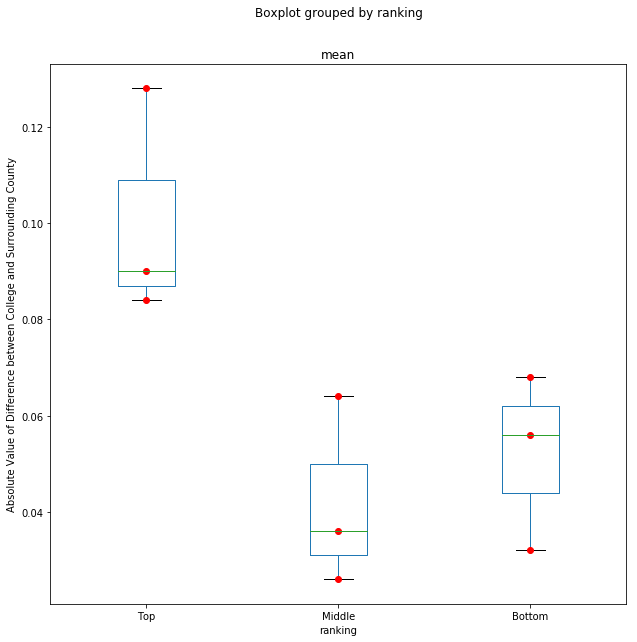

In [113]:
graph3 = df_summary.boxplot(by ='ranking', column =['mean'], grid = False) 
plt.plot(df_summary["ranking"]+1, df_summary["mean"],'r.',alpha=1,marker='o')
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
graph3.set_ylabel('Absolute Value of Difference between College and Surrounding County')

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*